 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [103]:
# Reading S&P TSX 60 Closing Prices
# Define the file path relative to the parent directory
file_path = 'Resources/whale_returns.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
print(df.head())

# Clean the data
# Drop any rows with missing values
df.dropna(inplace=True)

# Convert the 'Date' column to a DateTime data type
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index of the DataFrame
df.set_index('Date', inplace=True)
print(df.head())



         Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
0  2015-03-02                        NaN                 NaN   
1  2015-03-03                  -0.001266           -0.004981   
2  2015-03-04                   0.002230            0.003241   
3  2015-03-05                   0.004016            0.004076   
4  2015-03-06                  -0.007905           -0.003574   

   TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
0                          NaN                     NaN  
1                    -0.000496               -0.006569  
2                    -0.002534                0.004213  
3                     0.002355                0.006726  
4                    -0.008481               -0.013098  
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   

In [101]:
# Reading whale returns
# Define the file path for the CSV file
file_path = 'Resources/whale_returns.csv'

# Read the CSV file into a DataFrame
whale_returns = pd.read_csv(file_path)
print(whale_returns)


            Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
0     2015-03-02                        NaN                 NaN   
1     2015-03-03                  -0.001266           -0.004981   
2     2015-03-04                   0.002230            0.003241   
3     2015-03-05                   0.004016            0.004076   
4     2015-03-06                  -0.007905           -0.003574   
...          ...                        ...                 ...   
1055  2019-04-25                  -0.000285           -0.001291   
1056  2019-04-26                   0.008149            0.009162   
1057  2019-04-29                   0.001254            0.002719   
1058  2019-04-30                  -0.001295           -0.002211   
1059  2019-05-01                  -0.005847           -0.001341   

      TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
0                             NaN                     NaN  
1                       -0.000496               -0.006569  
2              

In [100]:
# Count nulls
null_counts = whale_returns.isnull().sum()
print(null_counts)


Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64


In [99]:
# Drop nulls
whale_returns.dropna(inplace=True)
print(whale_returns)


            Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
1     2015-03-03                  -0.001266           -0.004981   
2     2015-03-04                   0.002230            0.003241   
3     2015-03-05                   0.004016            0.004076   
4     2015-03-06                  -0.007905           -0.003574   
5     2015-03-09                   0.000582            0.004225   
...          ...                        ...                 ...   
1055  2019-04-25                  -0.000285           -0.001291   
1056  2019-04-26                   0.008149            0.009162   
1057  2019-04-29                   0.001254            0.002719   
1058  2019-04-30                  -0.001295           -0.002211   
1059  2019-05-01                  -0.005847           -0.001341   

      TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
1                       -0.000496               -0.006569  
2                       -0.002534                0.004213  
3              

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [98]:
# Reading algorithmic returns
# Define the file path for the CSV file
file_path = 'Resources/algo_returns.csv'

# Read the CSV file into a DataFrame
algo_returns = pd.read_csv(file_path)
print(algo_returns)


            Date    Algo 1    Algo 2
0     2014-05-28  0.001745       NaN
1     2014-05-29  0.003978       NaN
2     2014-05-30  0.004464       NaN
3     2014-06-02  0.005692       NaN
4     2014-06-03  0.005292       NaN
...          ...       ...       ...
1236  2019-04-25  0.000682 -0.007247
1237  2019-04-26  0.002981  0.005256
1238  2019-04-29  0.005208  0.002829
1239  2019-04-30 -0.002944 -0.001570
1240  2019-05-01  0.000094 -0.007358

[1241 rows x 3 columns]


In [96]:
# Count the null values in each column
null_counts = df.isnull().sum()
print(null_counts)

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64


In [95]:
# Drop rows with null values
df.dropna(inplace=True)
print(df)


            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [94]:
# Define the file path for the CSV file
file_path = 'Resources/sp_tsx_history.csv'

# Read the CSV file into a DataFrame
sp_tsx_60 = pd.read_csv(file_path)

# Convert 'Close' column to numeric data type
sp_tsx_60['Close'] = pd.to_numeric(sp_tsx_60['Close'], errors='coerce')

# Calculate the daily returns
sp_tsx_60['Date'] = pd.to_datetime(sp_tsx_60['Date'])  # Convert 'Date' column to datetime format
sp_tsx_60['Daily_Return'] = sp_tsx_60['Close'].pct_change()
print(sp_tsx_60)



           Date  Close  Daily_Return
0    2012-10-01    NaN           NaN
1    2012-10-02    NaN           NaN
2    2012-10-03    NaN           NaN
3    2012-10-04    NaN           NaN
4    2012-10-05    NaN           NaN
...         ...    ...           ...
1813 2019-12-20    NaN           NaN
1814 2019-12-23    NaN           NaN
1815 2019-12-24    NaN           NaN
1816 2019-12-27    NaN           NaN
1817 2019-12-30    NaN           NaN

[1818 rows x 3 columns]


In [34]:
# Check the data types of the columns
print(df.dtypes)

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object


In [67]:
# Clean the 'Close' column by removing special characters
sp_tsx_history['Close'] = sp_tsx_history['Close'].replace(',', '').replace('$', '')

# Convert the 'Close' column to numeric format
sp_tsx_history['Close'] = pd.to_numeric(sp_tsx_history['Close'])



In [ ]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()
print(df)

In [93]:
# Drop rows with null values
df.dropna(inplace=True)
print(df)


            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-

In [105]:
# Rename `Close` Column to be specific to this portfolio.
df.rename(columns={'Close': 'Portfolio_Close'}, inplace=True)
print(df)


            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [106]:
# Join whale_returns, algo_returns, and the sp_tsx_history into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns, sp_tsx_history], axis=1)
print(combined_returns)

            Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
0     2015-03-02                        NaN                 NaN   
1     2015-03-03                  -0.001266           -0.004981   
2     2015-03-04                   0.002230            0.003241   
3     2015-03-05                   0.004016            0.004076   
4     2015-03-06                  -0.007905           -0.003574   
...          ...                        ...                 ...   
1813         NaN                        NaN                 NaN   
1814         NaN                        NaN                 NaN   
1815         NaN                        NaN                 NaN   
1816         NaN                        NaN                 NaN   
1817         NaN                        NaN                 NaN   

      TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC        Date  \
0                             NaN                     NaN  2014-05-28   
1                       -0.000496               -

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

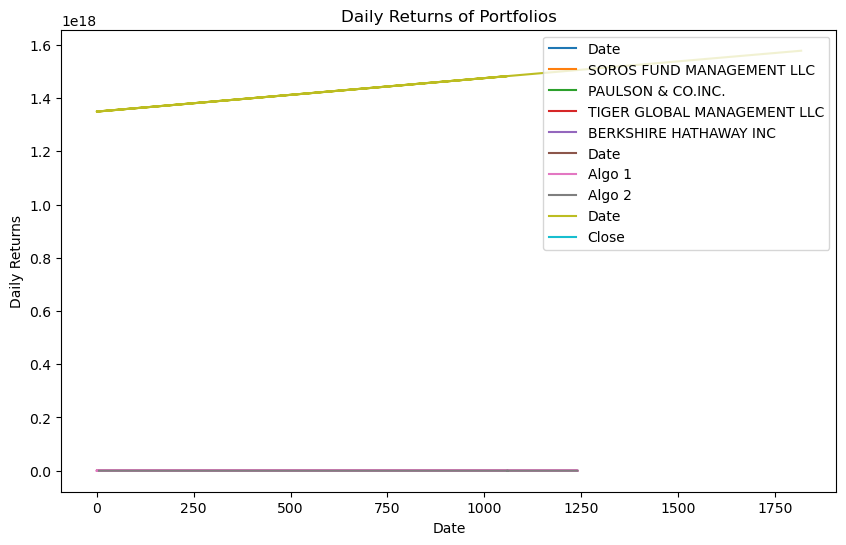

In [54]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Daily Returns of Portfolios')
plt.legend(loc='upper right')
plt.show()


#### Calculate and Plot cumulative returns.

      Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
0      NaN                        NaN                 NaN   
1      NaN                   0.998734            0.995019   
2      NaN                   1.000962            0.998245   
3      NaN                   1.004981            1.002314   
4      NaN                   0.997037            0.998731   
...    ...                        ...                 ...   
1813   NaN                        NaN                 NaN   
1814   NaN                        NaN                 NaN   
1815   NaN                        NaN                 NaN   
1816   NaN                        NaN                 NaN   
1817   NaN                        NaN                 NaN   

      TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  Date    Algo 1  \
0                             NaN                     NaN   NaN  1.001745   
1                        0.999504                0.993431   NaN  1.005730   
2                        0.996972   

/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


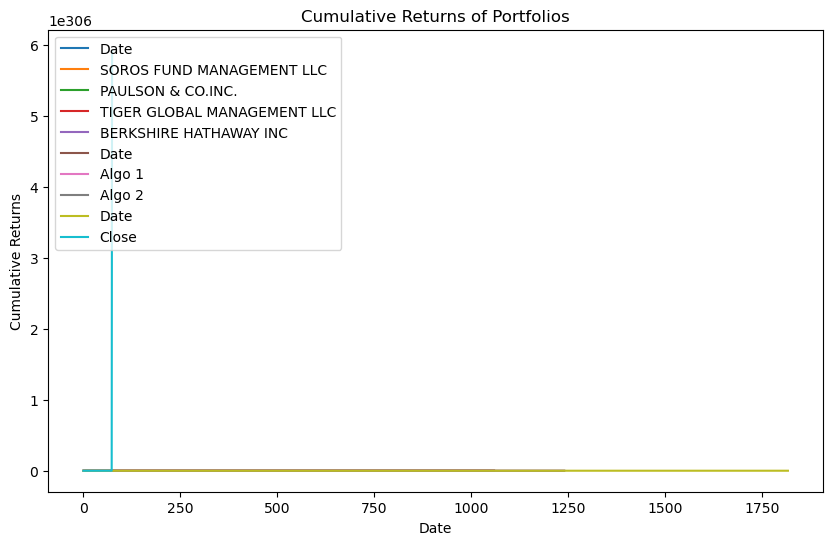

In [107]:
# Calculate cumulative returns of all portfolios

# Convert the data types to numeric
combined_returns = combined_returns.apply(pd.to_numeric, errors='coerce')

# Calculate the cumulative returns
cumulative_returns = (1 + combined_returns).cumprod()
print(cumulative_returns)


# Plot cumulative returns
cumulative_returns.plot(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns of Portfolios')
plt.legend(loc='upper left')
plt.show()


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


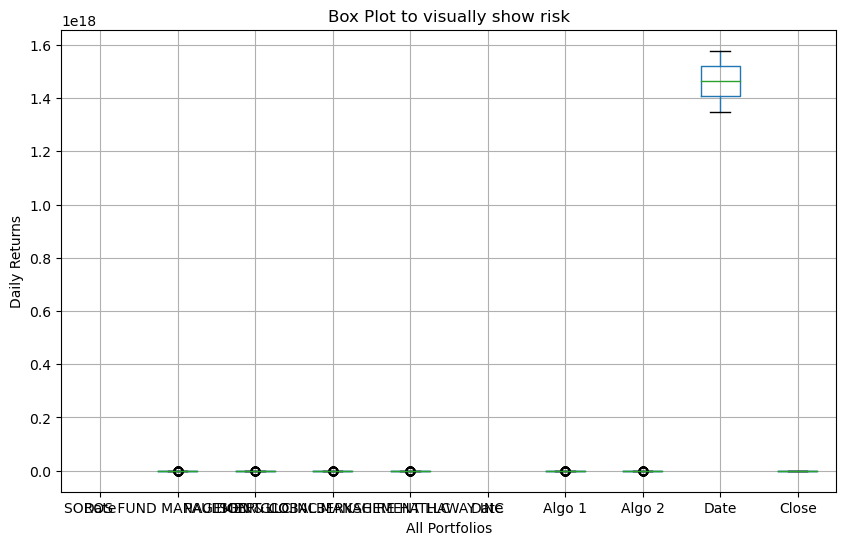

In [108]:
# Box plot to visually show risk
combined_returns.boxplot(figsize=(10, 6))
plt.xlabel('All Portfolios')
plt.ylabel('Daily Returns')
plt.title('Box Plot to visually show risk')
plt.show()

### Calculate Standard Deviations

In [109]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_returns.std()
print(daily_std)


Date                                    NaN
SOROS FUND MANAGEMENT LLC      7.841964e-03
PAULSON & CO.INC.              6.976871e-03
TIGER GLOBAL MANAGEMENT LLC    1.082428e-02
BERKSHIRE HATHAWAY INC         1.283077e-02
Date                                    NaN
Algo 1                         7.972395e-03
Algo 2                         8.466462e-03
Date                           6.602551e+16
Close                          1.328338e+03
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

In [111]:
# Calculate  the daily standard deviation of sp_tsx_history
daily_std = sp_tsx_history['Close'].std()
print(daily_std)

# Determine which portfolios are riskier than the sp_tsx_history
riskier_portfolios = portfolio_std[portfolio_std > index_std].index
print("riskier_portfolios: ", riskier_portfolios)


1328.3376132120675
riskier_portfolios:  Index(['Date'], dtype='object')


### Calculate the Annualized Standard Deviation

In [112]:
# Calculate the annualized standard deviation (252 trading days)
daily_std = combined_returns.std()

# Calculate the annualized standard deviation
annual_std = daily_std * (252 ** 0.5)
print(annual_std)


Date                                    NaN
SOROS FUND MANAGEMENT LLC      1.244873e-01
PAULSON & CO.INC.              1.107544e-01
TIGER GLOBAL MANAGEMENT LLC    1.718302e-01
BERKSHIRE HATHAWAY INC         2.036821e-01
Date                                    NaN
Algo 1                         1.265578e-01
Algo 2                         1.344009e-01
Date                           1.048122e+18
Close                          2.108671e+04
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

      Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
0      NaN                        NaN                 NaN   
1      NaN                        NaN                 NaN   
2      NaN                        NaN                 NaN   
3      NaN                        NaN                 NaN   
4      NaN                        NaN                 NaN   
...    ...                        ...                 ...   
1813   NaN                        NaN                 NaN   
1814   NaN                        NaN                 NaN   
1815   NaN                        NaN                 NaN   
1816   NaN                        NaN                 NaN   
1817   NaN                        NaN                 NaN   

      TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  Date  Algo 1  \
0                             NaN                     NaN   NaN     NaN   
1                             NaN                     NaN   NaN     NaN   
2                             NaN         

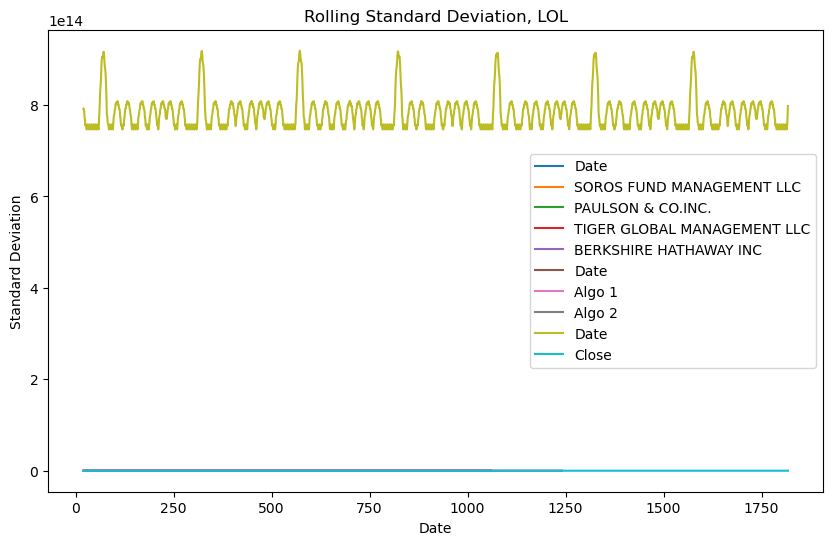

In [113]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
import pandas as pd
rolling_std = combined_returns.rolling(window=21).std()
print(rolling_std)

# Plot the rolling standard deviation
rolling_std.plot(figsize=(10, 6))
plt.title('Rolling Standard Deviation, LOL')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()


### Calculate and plot the correlation

                             Date  SOROS FUND MANAGEMENT LLC  \
Date                          NaN                        NaN   
SOROS FUND MANAGEMENT LLC     NaN                   1.000000   
PAULSON & CO.INC.             NaN                   0.700181   
TIGER GLOBAL MANAGEMENT LLC   NaN                   0.561745   
BERKSHIRE HATHAWAY INC        NaN                   0.754308   
Date                          NaN                        NaN   
Algo 1                        NaN                  -0.013446   
Algo 2                        NaN                  -0.003091   
Date                          NaN                   0.013807   
Close                         NaN                   0.034568   

                             PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  \
Date                                        NaN                          NaN   
SOROS FUND MANAGEMENT LLC              0.700181                     0.561745   
PAULSON & CO.INC.                      1.000000        

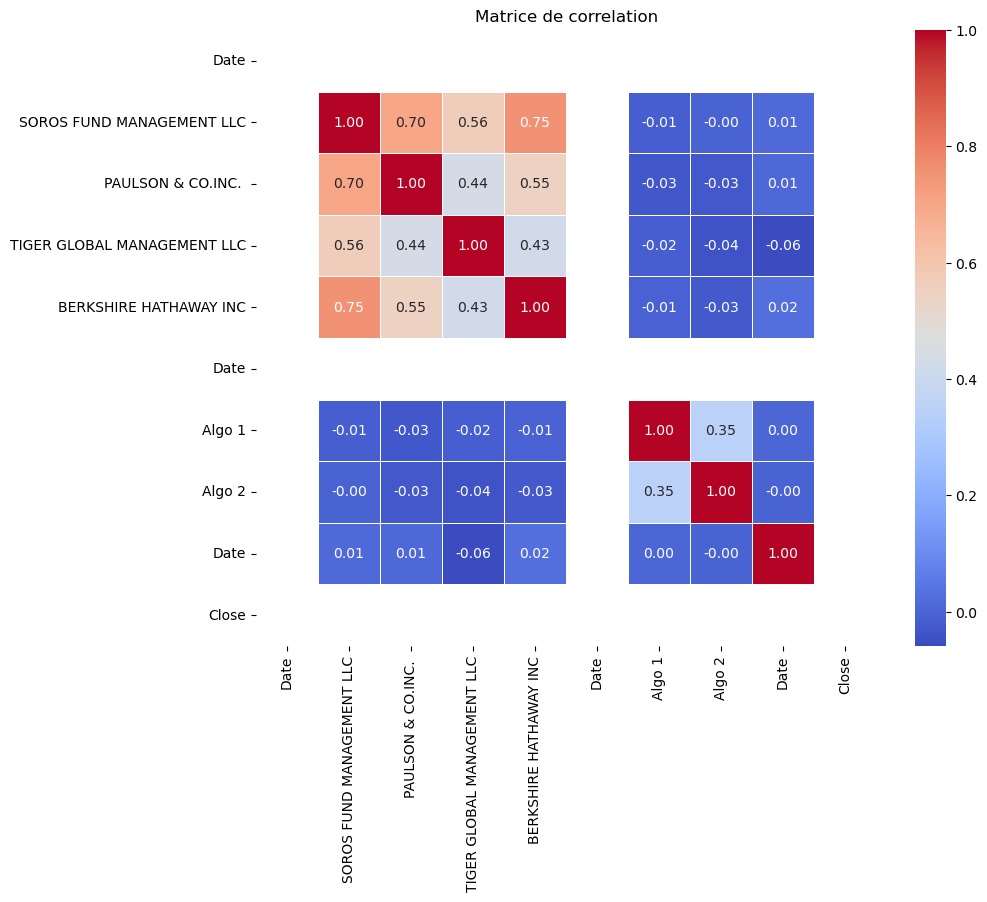

In [114]:
# Calculate the correlation
correlation_combined= combined_returns.corr()
print(correlation_combined)

# Display de correlation matrix (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de correlation')
plt.show()


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [ ]:
# Calculate covariance of a single portfolio
#covariance = portfolio_returns['Returns'].cov(singleportfolio_returns['Returns'])

# Calculate variance of S&P TSX
variance = sp_tsx_reaturns['Returns'].var()
print(variance)

# Computing beta
beta = covariance / variance
print(beta)

# Plot beta trend
plt.figure(figsize=(10, 6))
plt.plot(dates, beta_values, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.title('Beta Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [124]:
# Use `EWMA` to calculate the rolling window

rolling_window = Daily_Returns['Returns'].ewm(span=21).std()
# Plot the rolling window
plt.figure(figsize=(10, 6))
plt.plot(portfolio_returns['Date'], rolling_window, color='b')
plt.xlabel('Date')
plt.ylabel('Rolling Window')
plt.title('Rolling Window using EWMA')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


NameError: name 'Daily_Returns' is not defined

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [126]:
# Annualized Sharpe Ratios
excess_returns = daily_returns.sub(risk_free_rate, axis=0)

# Calculate the mean of the excess returns
mean_excess_returns = excess_returns.mean()

# Calculate the standard deviation of the excess returns
std_excess_returns = excess_returns.std()

# Calculate the annualized Sharpe Ratios
annualized_sharpe_ratios = (mean_excess_returns * np.sqrt(252)) / std_excess_returns

print(annualized_sharpe_ratios)


NameError: name 'daily_returns' is not defined

In [130]:
# Visualize the sharpe ratios as a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar([whale_returns, algo_returns, sp_tsx_history], annual_sharpe_ratios)
plt.xlabel('Portfolios')
plt.ylabel('Sharpe Ratio')
plt.title('Annualized Sharpe Ratios')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


NameError: name 'annual_sharpe_ratios' is not defined

<Figure size 1000x600 with 0 Axes>

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock
# Define the stock symbols and the start/end dates for the historical data
stocks = ['AAPL', 'MSFT', 'AMZN']
start_date = '2022-06-01'
end_date = '2023-06-01'

# Retrieve the stock prices
prices = pd.DataFrame()
for Stocks in stocks:
    data = pd.read_csv(f'Downloads/stockprices.csv')
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    prices[symbol] = data['Close']
